# Spam sms Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
spc = pd.read_csv('Desktop/Codsoft/datasets/spam.csv',encoding = "ISO-8859-1")

In [3]:
spc.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
spc.shape

(5572, 5)

In [5]:
spc.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [6]:
spc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
spc.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spc.rename(columns={"v1":"target","v2":"SMS_Text"},inplace = True)
spc.sample()

,target,SMS_Text
1435,ham,Dad went out oredi...


In [9]:
spc.rename(columns={"v1":"target","v2":"SMS_Text"},inplace = True)
spc.sample(5)

,target,SMS_Text
1422,spam,Congratulations ur awarded either å£500 of CD ...
4737,ham,I bought the test yesterday. Its something tha...
874,ham,Talk With Yourself Atleast Once In A Day...!!!...
2969,ham,U should make a fb list
2344,ham,Okie...


In [10]:
label_encode = LabelEncoder()

In [11]:
spc['target'] = label_encode.fit_transform(spc['target'])
spc.head()

,target,SMS_Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spc.isnull().sum()

target      0
SMS_Text    0
dtype: int64

In [13]:
spc.duplicated().sum()

403

In [14]:
spc = spc.drop_duplicates(keep ="first")

In [15]:
spc.duplicated().sum()

0

In [16]:
spc.shape

(5169, 2)

In [17]:
spc.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
spc["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

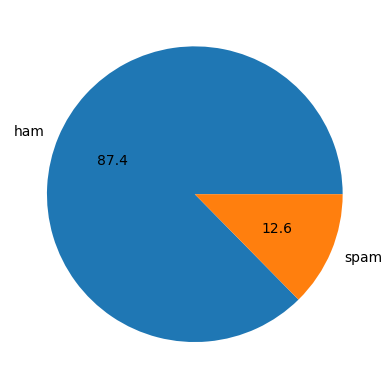

In [19]:
plt.pie(spc["target"].value_counts(), labels = ['ham','spam'],autopct="%0.1f")
plt.show()

In [20]:
spc["num of characters"] = spc["SMS_Text"].apply(len)
spc.head()

,target,SMS_Text,num of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
spc["num of words"] = spc["SMS_Text"].apply(lambda x : len(nltk.word_tokenize(x)))
spc.head()

,target,SMS_Text,num of characters,num of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
spc["num of sentences"] = spc["SMS_Text"].apply(lambda x : len(nltk.sent_tokenize(x)))
spc.head()

,target,SMS_Text,num of characters,num of words,num of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
spc[["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
spc[spc['target']==0][["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
spc[spc['target']==1][["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Text(0, 0.5, 'num of Characters')

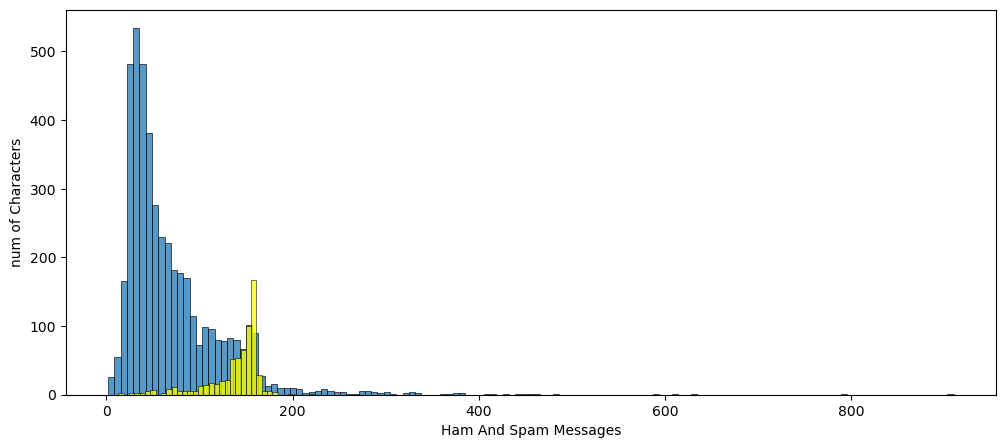

In [26]:
plt.figure(figsize=(12,5))
sns.histplot(spc[spc["target"]==0]["num of characters"])
sns.histplot(spc[spc["target"]==1]["num of characters"],color = "yellow")
plt.xlabel('Ham And Spam Messages')
plt.ylabel('num of Characters')

<AxesSubplot:>

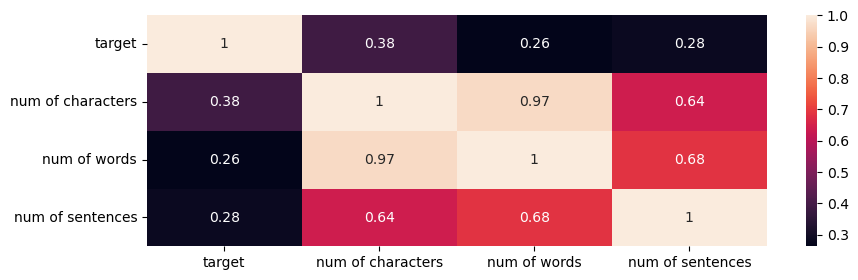

In [27]:
plt.figure(figsize=(10,3))
sns.heatmap(spc.corr(),annot=True)

In [28]:
ps = PorterStemmer()

In [29]:
def transform_text(Input_text):
  #lower case
  Input_text.lower()

  #tokenization
  Input_text = nltk.word_tokenize(Input_text)

  #special character
  temp = []
  for i in Input_text:
    if i.isalnum():
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  #stop words
  for i in Input_text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  # Stemming
  for i in Input_text:
    temp.append(ps.stem(i))
  Input_text = temp[:]

  return " ".join(Input_text)

In [30]:
spc["transformed"] = spc["SMS_Text"].apply(transform_text)

In [31]:
spc.head()

,target,SMS_Text,num of characters,num of words,num of sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

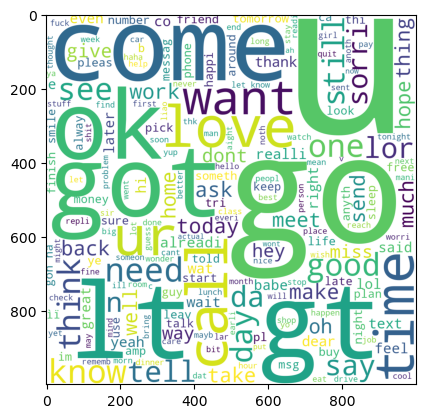

In [33]:
ham_wc = wc.generate(spc[spc["target"]==0]["transformed"].str.cat(sep=" "))
plt.imshow(ham_wc)

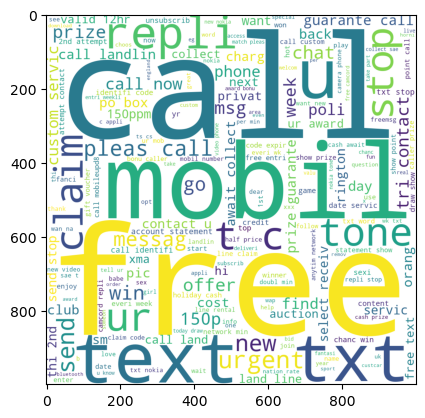

In [34]:
spam_wc = wc.generate(spc[spc["target"]==1]["transformed"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 3000)

In [36]:
X_data = tf_idf.fit_transform(spc["transformed"]).toarray()

In [37]:
X_data.shape

(5169, 3000)

In [38]:
y_data = spc["target"].values
y_data

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
y_data = spc["target"].values
y_data

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_data,test_size = 0.2, random_state=2)

In [41]:
print(X_train.shape)
X_test.shape

(4135, 3000)


(1034, 3000)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [43]:
svc = SVC(kernel = 'sigmoid',gamma=1)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
classification = {
    "SVC": svc,
    "GNB": gnb,
    "MN-NB": mnb,
    "BNB": bnb,
    "LR": lrc,
}

In [45]:
def train_classifier(classification,X_train,Y_train,X_test,Y_test):
  classification.fit(X_train,Y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  return accuracy, precision

In [46]:
score_accuracy = []
score_prec = []
for name,clf in classification.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)

  print("For ",name)
  print("accuracy",current_accuracy)
  print("Precision",current_precision)

  score_accuracy.append(current_accuracy)
  score_prec.append(current_precision)

For  SVC
accuracy 0.9787234042553191
Precision 0.9915254237288136
For  GNB
accuracy 0.874274661508704
Precision 0.5190476190476191
For  MN-NB
accuracy 0.9748549323017408
Precision 1.0
For  BNB
accuracy 0.9845261121856866
Precision 0.9919354838709677
For  LR
accuracy 0.9555125725338491
Precision 0.96


In [47]:
performance_df = pd.DataFrame({'Algorithms':classification.keys(),'Accuracy':score_accuracy,'Precision':score_prec}).sort_values('Precision',ascending =False)
performance_df

,Algorithms,Accuracy,Precision
2,MN-NB,0.974855,1.000000
3,BNB,0.984526,0.991935
0,SVC,0.978723,0.991525
4,LR,0.955513,0.960000
1,GNB,0.874275,0.519048


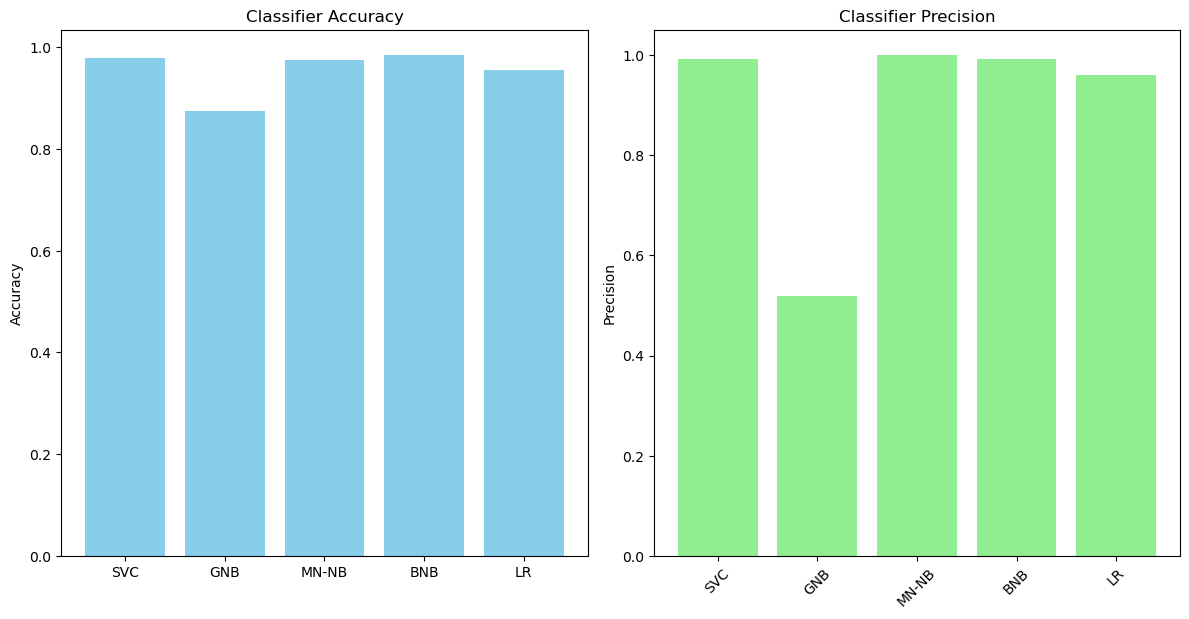

In [48]:
# List of classifier names
classifier_names = list(classification.keys())

# List of accuracy and precision scores
accuracy_scores = score_accuracy
precision_scores = score_prec

# Create subplots for accuracy and precision
plt.figure(figsize=(12, 6))

# Plot accuracy scores
plt.subplot(1, 2, 1)
plt.bar(classifier_names, accuracy_scores, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')

# Plot precision scores
plt.subplot(1, 2, 2)
plt.bar(classifier_names, precision_scores, color='lightgreen')
plt.ylabel('Precision')
plt.title('Classifier Precision')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

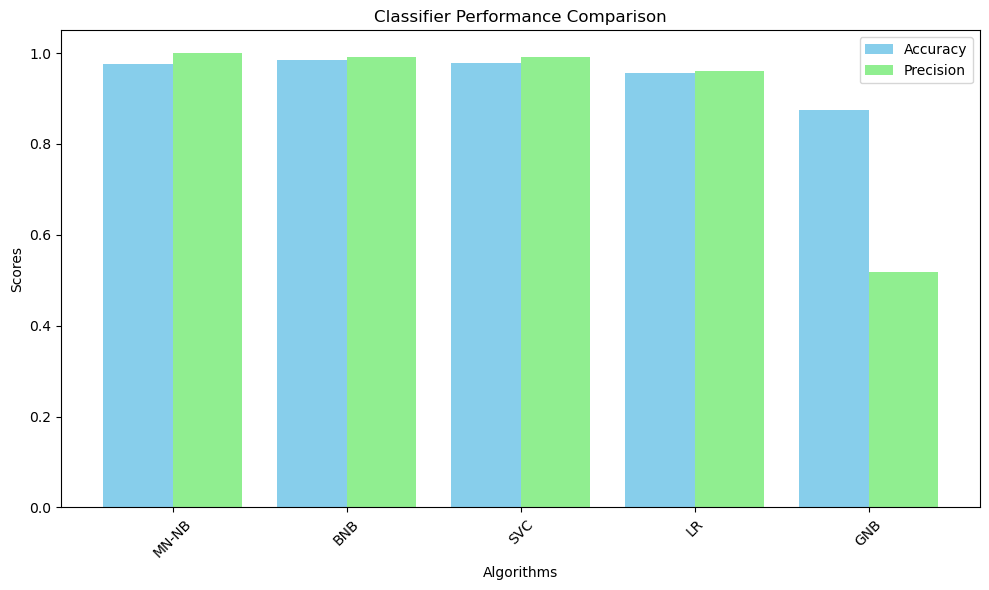

In [49]:
# Sort the DataFrame by Precision in descending order
performance_df = performance_df.sort_values('Precision', ascending=False)

algorithms = performance_df['Algorithms']
accuracy_scores = performance_df['Accuracy']
precision_scores = performance_df['Precision']

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(algorithms))

plt.bar(index, accuracy_scores, bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision', color='lightgreen')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Classifier Performance Comparison')
plt.xticks([i + bar_width / 2 for i in index], algorithms, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()